# Logistic Regression for classification problem.

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Helper Functions

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-z))

def plot_data(X, y):
    """
    Plots the data points X and y into a new figure
    """
    plt.figure()
    
    pos = y == 1
    neg = y == 0
    
    plt.plot(X[pos, 0], X[pos, 1], 'k+', linewidth=2, markersize=7)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', markerfacecolor='y', markersize=7)
    
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])

def cost_function(theta, X, y):
    """
    Compute cost and gradient for logistic regression
    """
    m = len(y)
    
    predictions = sigmoid(X @ theta)
    
    J = (-1/m) * (y.T @ np.log(predictions) + (1-y).T @ np.log(1-predictions))
    grad = (1/m) * X.T @ (predictions - y)
    
    return J, grad

def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters
    """
    return np.round(sigmoid(X @ theta))

## Main Implementation

In [6]:
# Load Data
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]

# Plot data

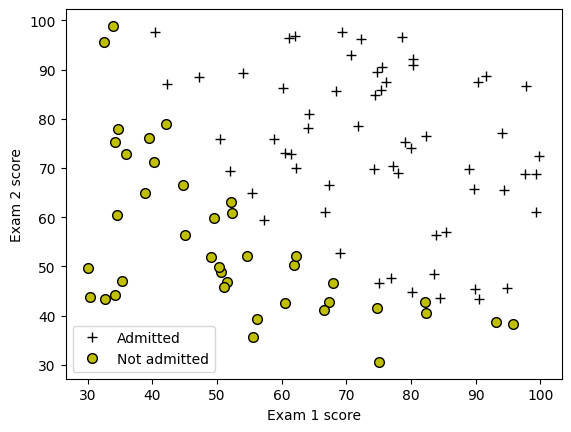

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


In [4]:
# Plot the data
plot_data(X, y)
plt.show()
print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.")

In [5]:
# Add intercept term
m, n = X.shape
X = np.hstack([np.ones((m, 1)), X])

## Compute initial cost and gradient

In [6]:
# Initialize parameters
initial_theta = np.zeros(n + 1)
cost, grad = cost_function(initial_theta, X, y)
print(f'Cost at initial theta (zeros): {cost}')
print(f'Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628")

Cost at initial theta (zeros): 0.6931471805599452
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [7]:
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)
print(f'Cost at initial theta (zeros): {cost}')
print(f'Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad)
print("Expected gradients (approx):\n 0.043\n 2.566\n 2.647")


Cost at initial theta (zeros): 0.2183301938265977
Expected cost (approx): 0.218
Gradient at test theta:
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647


In [8]:
# Optimize using scipy
result = optimize.minimize(fun=lambda t: cost_function(t, X, y)[0], 
                         x0=initial_theta,
                         method='BFGS',
                         jac=lambda t: cost_function(t, X, y)[1],
                         options={'maxiter': 400})

theta = result.x
cost = result.fun

print(f'\nCost at theta found by optimize: {cost}')
print(f'Expected cost (approx): 0.203')
print('theta:')
print(theta)
print("Expected theta (approx):")
print(" -25.161\n  0.206\n  0.201")


Cost at theta found by optimize: 0.20349770158944375
Expected cost (approx): 0.203
theta:
[-25.16133284   0.2062317    0.2014716 ]
Expected theta (approx):
 -25.161
  0.206
  0.201


C:\Users\Kenny\AppData\Local\Temp\ipykernel_21544\3119125320.py:31: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T @ np.log(predictions) + (1-y).T @ np.log(1-predictions))
C:\Users\Kenny\AppData\Local\Temp\ipykernel_21544\3119125320.py:31: RuntimeWarning: invalid value encountered in matmul
  J = (-1/m) * (y.T @ np.log(predictions) + (1-y).T @ np.log(1-predictions))


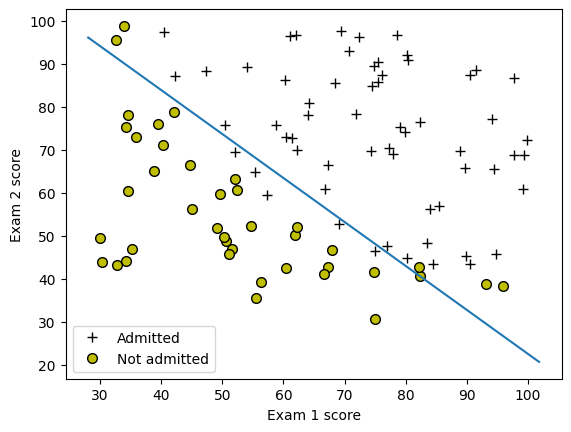

In [9]:
# Plot decision boundary
plot_data(X[:, 1:3], y)
plot_x = np.array([min(X[:, 1])-2, max(X[:, 1])+2])
plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
plt.plot(plot_x, plot_y)
plt.show()

In [10]:
# Predict probability for a student with scores 45,85
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print(f'\nFor a student with scores 45 and 85, we predict an admission probability of {prob}')
print("Expected value: 0.775 +/- 0.002\n")


For a student with scores 45 and 85, we predict an admission probability of 0.7762907240588947
Expected value: 0.775 +/- 0.002



In [11]:
# Compute accuracy on training set
p = predict(theta, X)
print(f'Train Accuracy: {np.mean(p == y) * 100}%')
print("Expected accuracy (approx): 89.0")

Train Accuracy: 89.0%
Expected accuracy (approx): 89.0


# Regularized Logistic Regression Exercise

In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [13]:
def sigmoid(z):
    """
    Compute sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-z))

def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters
    """
    return np.round(sigmoid(X @ theta))

def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features
    """
    degree = 6
    X1 = np.array(X1).flatten()
    X2 = np.array(X2).flatten()
    out = np.ones(len(X1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.column_stack((out, (X1 ** (i-j)) * (X2 ** j)))
            
    return out
    
def cost_function_reg(theta, X, y, lambda_param):
    """
    Compute cost and gradient for logistic regression with regularization
    """
    m = len(y)
    predictions = sigmoid(X @ theta)
    reg_term = (lambda_param / (2 * m)) * np.sum(theta[1:] ** 2)
    
    J = (-1/m) * (y.T @ np.log(predictions) + (1-y).T @ np.log(1-predictions)) + reg_term
    
    grad = np.zeros(theta.shape)
    grad[0] = (1/m) * (X[:, 0].T @ (predictions - y))
    grad[1:] = (1/m) * (X[:, 1:].T @ (predictions - y)) + (lambda_param/m) * theta[1:]
    
    return J, grad

def plot_decision_boundary(theta, X, y):
    """
    Plot decision boundary for logistic regression
    """
    # Plot data points
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 1], X[pos, 2], c='k', marker='+', label='y = 1')
    plt.scatter(X[neg, 1], X[neg, 2], c='y', marker='o', label='y = 0')

    # Create grid for contour plot
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta * features for grid points
    for i in range(len(u)):
        for j in range(len(v)):
            # Compute feature mapping for grid points and use @ for dot product
            z[i, j] = map_feature(np.array([u[i]]), np.array([v[j]])).dot(theta).item()
    
    # Transpose z for proper contour plot orientation
    z = z.T

    # Plot contour for decision boundary (z = 0)
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g', linestyles='-')
    plt.plot([], [], 'g-', label='Decision Boundary')  # Dummy plot for legend

    # Add labels and legend
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.title('Data and Decision Boundary')
    plt.show()

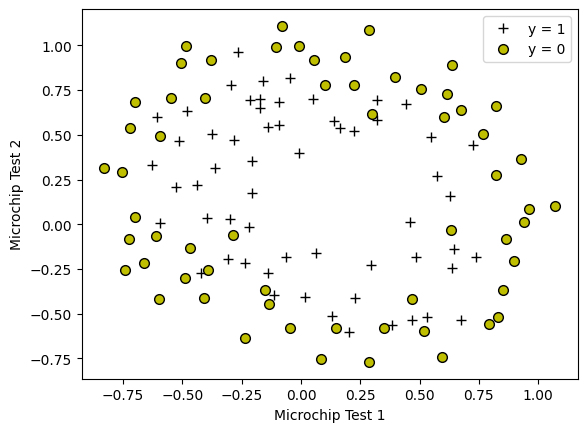

In [14]:
# Load Data
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]

# Plot data
plt.figure()
pos = y == 1
neg = y == 0
plt.plot(X[pos, 0], X[pos, 1], 'k+', linewidth=2, markersize=7)
plt.plot(X[neg, 0], X[neg, 1], 'ko', markerfacecolor='y', markersize=7)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.show()

In [15]:
# Add polynomial features
X = map_feature(X[:, 0], X[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
lambda_param = 1

# Compute initial cost and gradient for regularized logistic regression
cost, grad = cost_function_reg(initial_theta, X, y, lambda_param)
print(f'Cost at initial theta (zeros): {cost}')
print(f'Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values:')
print(grad[:5])
print(" 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115")


Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values:
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [16]:
test_theta = np.ones(X.shape[1])


cost, grad = cost_function_reg(test_theta, X, y, 10)
print(f'Cost at theta (with lambda = 10): {cost}')
print(f'Expected cost (approx): 3.16')
print('Gradient at initial theta (zeros) - first five values:')
print(grad[:5])
print(" 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n")

Cost at theta (with lambda = 10): 3.1645093316150095
Expected cost (approx): 3.16
Gradient at initial theta (zeros) - first five values:
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [17]:
# Optimize using scipy
result = optimize.minimize(
    fun=lambda t: cost_function_reg(t, X, y, lambda_param)[0],
    x0=initial_theta,
    method='BFGS',
    jac=lambda t: cost_function_reg(t, X, y, lambda_param)[1],
    options={'maxiter': 400}
)

theta = result.x




## Decision boundary with $\lambda$ = 1

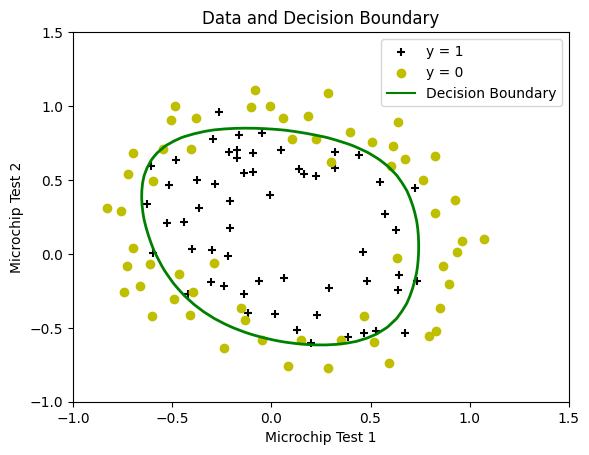

In [18]:
# Plot decision boundary
plot_decision_boundary(theta, X, y)

In [19]:
# Prever os valores no conjunto de treinamento
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

Train Accuracy: 83.05%


### Decision boundary with $\lambda$ = 0 (No regularization -> overfitting) 

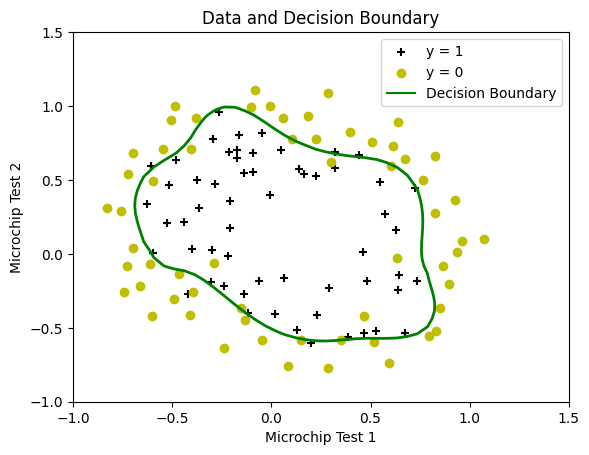

In [20]:
lambda_param = 0

result = optimize.minimize(
    fun=lambda t: cost_function_reg(t, X, y, lambda_param)[0],
    x0=initial_theta,
    method='BFGS',
    jac=lambda t: cost_function_reg(t, X, y, lambda_param)[1],
    options={'maxiter': 400}
)

theta = result.x

plot_decision_boundary(theta, X, y)

In [21]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

Train Accuracy: 88.14%


### Decision boundary with $\lambda$ = 100 (Too much regularization -> underfitting) 

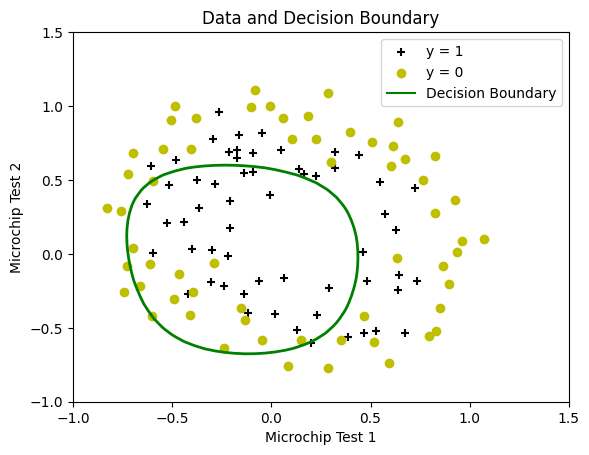

In [22]:
lambda_param = 100

result = optimize.minimize(
    fun=lambda t: cost_function_reg(t, X, y, lambda_param)[0],
    x0=initial_theta,
    method='BFGS',
    jac=lambda t: cost_function_reg(t, X, y, lambda_param)[1],
    options={'maxiter': 400}
)

theta = result.x

plot_decision_boundary(theta, X, y)

In [23]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

Train Accuracy: 61.02%


## Implementation of Gradient Descent

In [24]:
# Gradient descent for logistic regression with regularization
def gradientDescentReg(X, y, theta, alpha, lambda_, num_iters):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        cost, grad = cost_function_reg(theta, X, y, lambda_)
        theta -= alpha * grad
        J_history.append(cost)

    return theta, J_history

Cost at optimal theta: 0.5290031921162219
Optimal theta: [ 1.27072257  0.62430098  1.18009252 -2.0168194  -0.91424006]


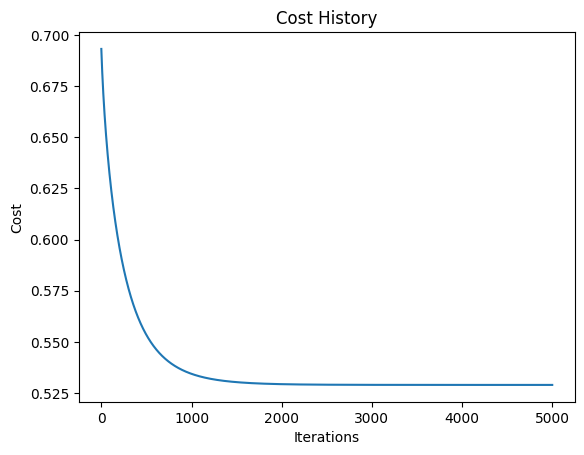

In [25]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
alpha = 0.1
num_iters = 5000

# Perform gradient descent
optimal_theta, J_history = gradientDescentReg(X, y, initial_theta, alpha, lambda_, num_iters)
cost_at_optimal_theta, _ = cost_function_reg(optimal_theta, X, y, lambda_)

print(f"Cost at optimal theta: {cost_at_optimal_theta}")
print(f"Optimal theta: {optimal_theta[:5]}")

# Plot cost history
plt.plot(range(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

# Cost at optimal theta: 0.5290027422869218
# Optimal theta: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468]

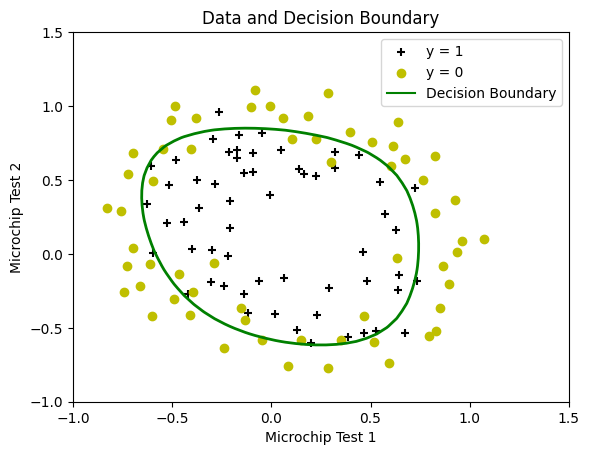

In [26]:
theta = optimal_theta

plot_decision_boundary(theta, X, y)

In [27]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

Train Accuracy: 83.05%


### A good exercise is to vary the hyperparameters lambda, niters, alpha

## Using quasi-Newton method

In [28]:
def bfgs_optimizer(cost_function, grad_function, theta_init, X, y, lambda_, max_iter=500, tol=1e-6):
    """
    Implements the quasi-Newton BFGS optimization algorithm.

    Parameters:
        cost_function: Function to compute the cost J(theta)
        grad_function: Function to compute the gradient of J(theta)
        theta_init: Initial parameters
        X: Input data matrix
        y: Target labels
        lambda_: Regularization parameter
        max_iter: Maximum number of iterations
        tol: Convergence tolerance for the norm of the gradient

    Returns:
        theta: Optimized parameters
        cost_history: List of cost values during optimization
    """
    m, n = X.shape
    theta = theta_init
    B = np.eye(len(theta))  # Initial Hessian approximation (identity matrix)
    cost_history = []

    for iteration in range(max_iter):
        # Compute cost and gradient
        cost, grad = cost_function(theta, X, y, lambda_)
        cost_history.append(cost)

        # Convergence check
        if np.linalg.norm(grad, ord=2) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        # Update step
        p = -np.linalg.solve(B, grad)  # Compute search direction using B
        alpha = 1  # Fixed step size (line search can be implemented here)
        theta_new = theta + alpha * p

        # Compute new gradient and delta values
        _, grad_new = cost_function(theta_new, X, y, lambda_)
        delta_theta = theta_new - theta
        delta_grad = grad_new - grad

        # Update the Hessian approximation B using BFGS formula
        delta_theta = delta_theta[:, np.newaxis]
        delta_grad = delta_grad[:, np.newaxis]
        term1 = (delta_grad @ delta_grad.T) / (delta_grad.T @ delta_theta)
        term2 = (B @ delta_theta @ delta_theta.T @ B) / (delta_theta.T @ B @ delta_theta)
        B = B + term1 - term2

        # Update theta and gradient
        theta = theta_new

    return theta, cost_history

Converged after 57 iterations.
Final cost: 0.5290027297554696
Optimal theta: [ 1.27273606  0.62527174  1.18108832 -2.0199254  -0.91744514]


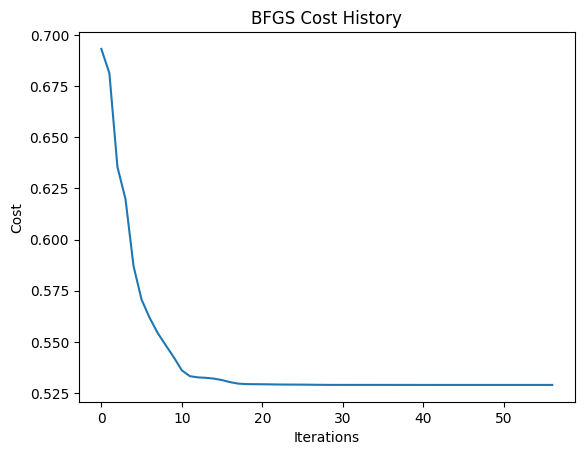

In [29]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
max_iter = 500

# Run BFGS optimization
optimal_theta, cost_history = bfgs_optimizer(
    cost_function=lambda t, X, y, l: cost_function_reg(t, X, y, l),
    grad_function=lambda t, X, y, l: cost_function_reg(t, X, y, l)[1],
    theta_init=initial_theta,
    X=X,
    y=y,
    lambda_=lambda_,
    max_iter=max_iter
)

print(f"Final cost: {cost_history[-1]}")
print(f"Optimal theta: {optimal_theta[:5]}")

# Cost at optimal theta: 0.5290027422869218
# Optimal theta: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468]

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("BFGS Cost History")
plt.show()

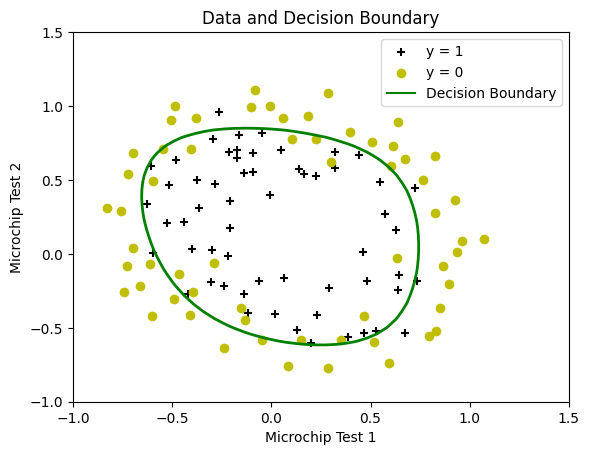

In [30]:
theta = optimal_theta

plot_decision_boundary(theta, X, y)

In [31]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

Train Accuracy: 83.05%


## Using Newton Method

In [32]:
def newton_optimizer(cost_function, grad_function, hessian_function, theta_init, X, y, lambda_, max_iter=100, tol=1e-6):
    """
    Implements the Newton's optimization method.

    Parameters:
        cost_function: Function to compute the cost J(theta)
        grad_function: Function to compute the gradient of J(theta)
        hessian_function: Function to compute the Hessian matrix of J(theta)
        theta_init: Initial parameters
        X: Input data matrix
        y: Target labels
        lambda_: Regularization parameter
        max_iter: Maximum number of iterations
        tol: Convergence tolerance for the norm of the gradient

    Returns:
        theta: Optimized parameters
        cost_history: List of cost values during optimization
    """
    theta = theta_init
    cost_history = []

    for iteration in range(max_iter):
        # Compute cost, gradient, and Hessian
        cost, grad = cost_function(theta, X, y, lambda_)
        hessian = hessian_function(theta, X, lambda_)

        cost_history.append(cost)

        # Convergence check
        if np.linalg.norm(grad, ord=2) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        # Update theta using Newton's update step
        delta_theta = np.linalg.solve(hessian, -grad)  # Solve H * delta_theta = -grad
        theta += delta_theta

    return theta, cost_history

# Define Hessian for logistic regression regularized
def hessian_function(theta, X, lambda_):
    """
    Compute the Hessian matrix for logistic regression with regularization.
    """
    m, n = X.shape
    predictions = sigmoid(X @ theta)
    diag = predictions * (1 - predictions)  # Diagonal weights
    R = np.diag(diag)  # Create diagonal matrix
    H = (1 / m) * X.T @ R @ X  # Compute unregularized Hessian
    H[1:, 1:] += (lambda_ / m) * np.eye(n - 1)  # Add regularization term (excluding theta_0)
    return H

Converged after 5 iterations.
Final cost: 0.529002729712647
Optimal theta: [ 1.27273949  0.62527179  1.18108866 -2.01996084 -0.91742374]


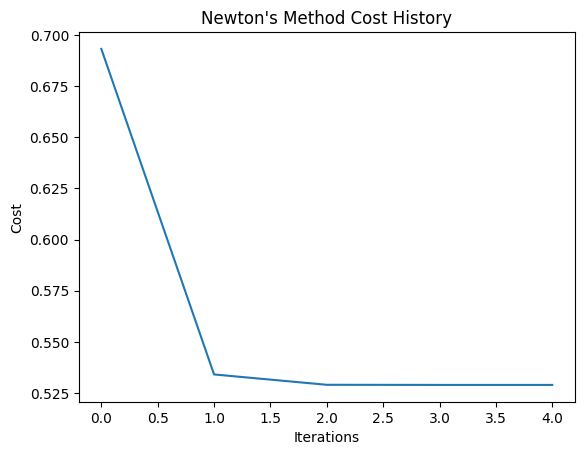

In [33]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
max_iter = 20

# Run Newton's method
optimal_theta, cost_history = newton_optimizer(
    cost_function=lambda t, X, y, l: cost_function_reg(t, X, y, l),
    grad_function=lambda t, X, y, l: cost_function_reg(t, X, y, l)[1],
    hessian_function=hessian_function,
    theta_init=initial_theta,
    X=X,
    y=y,
    lambda_=lambda_,
    max_iter=max_iter
)

print(f"Final cost: {cost_history[-1]}")
print(f"Optimal theta: {optimal_theta[:5]}")

# Cost at optimal theta: 0.5290027422869218
# Optimal theta: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468]

# Plot cost history

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Newton's Method Cost History")
plt.show()

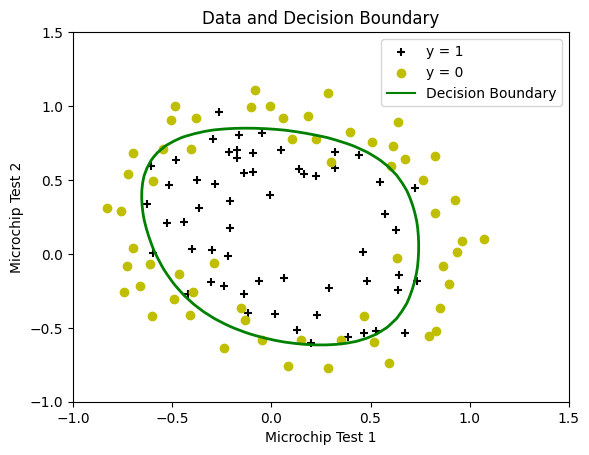

In [34]:
theta = optimal_theta

plot_decision_boundary(theta, X, y)

In [35]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')

Train Accuracy: 83.05%


# # Modifications in Gradient Descent

In [36]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

def sigmoid(z):
    """
    Compute sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-z))

def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters
    """
    return np.round(sigmoid(X @ theta))

def map_feature(X1, X2, degree = 6):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.array(X1).flatten()
    X2 = np.array(X2).flatten()
    out = np.ones(len(X1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.column_stack((out, (X1 ** (i-j)) * (X2 ** j)))
            
    return out
    
def plot_decision_boundary(theta, X, y, degree = 6):
    """
    Plot decision boundary for logistic regression
    """
    # Plot data points
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 1], X[pos, 2], c='k', marker='+', label='y = 1')
    plt.scatter(X[neg, 1], X[neg, 2], c='y', marker='o', label='y = 0')

    # Create grid for contour plot
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta * features for grid points
    for i in range(len(u)):
        for j in range(len(v)):
            # Compute feature mapping for grid points and use @ for dot product
            z[i, j] = map_feature(np.array([u[i]]), np.array([v[j]]), degree).dot(theta).item()
    
    # Transpose z for proper contour plot orientation
    z = z.T

    # Plot contour for decision boundary (z = 0)
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g', linestyles='-')
    plt.plot([], [], 'g-', label='Decision Boundary')  # Dummy plot for legend

    # Add labels and legend
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.title('Data and Decision Boundary')
    plt.show()

def cost_function_reg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    """
    m = len(y)
    predictions = sigmoid(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    
    J = (-1/m) * (y.T @ np.log(predictions) + (1-y).T @ np.log(1-predictions)) + reg_term
    
    grad = np.zeros(theta.shape)
    grad[0] = (1/m) * (X[:, 0].T @ (predictions - y))
    grad[1:] = (1/m) * (X[:, 1:].T @ (predictions - y)) + (lambda_/m) * theta[1:]
    
    return J, grad

In [37]:
def backtracking_line_search_armijo(theta, grad, cost, cost_function, X, y, lambda_, alpha=1, beta=0.8, c=1e-4, max_iter=50, alpha_min=1e-6):
    """
    Backtracking line search with Armijo condition and iteration limit.
    """
    p = -grad
    for _ in range(max_iter):
        if alpha < alpha_min:
            print(f"Using alpha min: {alpha_min}")
            return alpha
        new_theta = theta + alpha * p
        new_cost, _ = cost_function_reg(new_theta, X, y, lambda_)
        if new_cost <= cost - c * alpha * np.linalg.norm(p)**2:
            return alpha
        alpha *= beta
    print(f"Armijo line search reached maximum iterations. Using last alpha: {alpha}")
    return alpha

## Wolfe and Strong Wolfe are not working correctly
def backtracking_line_search_wolfe(theta, grad, cost, cost_function, X, y, lambda_, alpha=1, beta=0.8, c1=1e-4, c2=0.1, max_iter=50, alpha_min=1e-6):
    """
    Backtracking line search with Wolfe conditions and iteration limit.
    """
    d = -grad  # Direction of descent
    for _ in range(max_iter):
        if alpha < alpha_min:
            print(f"Using alpha min: {alpha_min}")
            return alpha
        
        new_theta = theta + alpha * d
        new_cost, new_grad = cost_function_reg(new_theta, X, y, lambda_)
        
        # Wolfe condition 1: Armijo condition
        armijo = new_cost <= cost + c1 * alpha * grad.T @ d
        
        # Wolfe condition 2: Curvature condition
        curvature = new_grad.T @ d >= c2 * grad.T @ d
        # curvature = True
        
        # Check if both conditions are satisfied
        if armijo and curvature:
            return alpha
        
        # If not, reduce alpha and continue
        alpha *= beta

    print(f"Wolfe line search reached maximum iterations. Using last alpha: {alpha}")
    return alpha

def backtracking_line_search_strong_wolfe(theta, grad, cost, cost_function, X, y, lambda_, alpha=1, beta=0.8, c1=1e-4, c2=0.9, max_iter=50, alpha_min=1e-6):
    """
    Backtracking line search with Strong Wolfe conditions and iteration limit.
    """
    for _ in range(max_iter):
        if alpha < alpha_min:
            print(f"Using alpha min: {alpha_min}")
            return alpha
        new_theta = theta - alpha * grad
        new_cost, new_grad = cost_function_reg(new_theta, X, y, lambda_)
        
        # Strong Wolfe condition 1: Armijo condition
        if new_cost > cost - c1 * alpha * np.linalg.norm(grad)**2:
            alpha *= beta
            continue
        
        # Strong Wolfe condition 2: Curvature condition (absolute value)
        if np.abs(new_grad.T @ grad) > c2 * np.abs(grad.T @ grad):
            alpha *= beta
            continue
        
        return alpha
    print(f"Strong Wolfe line search reached maximum iterations. Using last alpha: {alpha}")
    return alpha

def gradient_descent_with_line_search(X, y, theta_init, lambda_, max_iter=100, tol=1e-6, line_search="armijo", verbose=False, verbose_interval=5):
   theta = theta_init
   cost_history = []
   alpha = 1
   
   for iteration in range(max_iter):
       if verbose and (iteration + 1) % verbose_interval == 0:
           print(f"Optimization step {iteration + 1}/{max_iter}")
           
       cost, grad = cost_function_reg(theta, X, y, lambda_)
       cost_history.append(cost)
       
       if line_search == "armijo":
           alpha = backtracking_line_search_armijo(theta, grad, cost, cost_function_reg, X, y, lambda_, alpha)
       elif line_search == "wolfe":
           alpha = backtracking_line_search_wolfe(theta, grad, cost, cost_function_reg, X, y, lambda_, alpha)
       elif line_search == "strong_wolfe":
           alpha = backtracking_line_search_strong_wolfe(theta, grad, cost, cost_function_reg, X, y, lambda_, alpha)
       else:
           raise ValueError("Invalid line search method")
           
       theta -= alpha * grad
       
       if np.linalg.norm(grad, ord=2) < tol:
           if verbose:
               print(f"Optimization terminated successfully: Gradient norm below tolerance ({tol})")
           break
           
   return theta, cost_history

In [38]:
# Load Data
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]

# Add polynomial features and intercept term
degree = 6
X = map_feature(X[:, 0], X[:, 1], degree)


Optimization step 50/500
Optimization step 100/500
Optimization step 150/500
Optimization step 200/500
Optimization step 250/500
Optimization step 300/500
Optimization step 350/500
Optimization step 400/500
Optimization step 450/500
Optimization step 500/500
Runtime: 0.0672 seconds
Final cost: 0.5290031804812526
Optimal theta: [ 1.2707781   0.62433207  1.18012329 -2.01689612 -0.91431216]


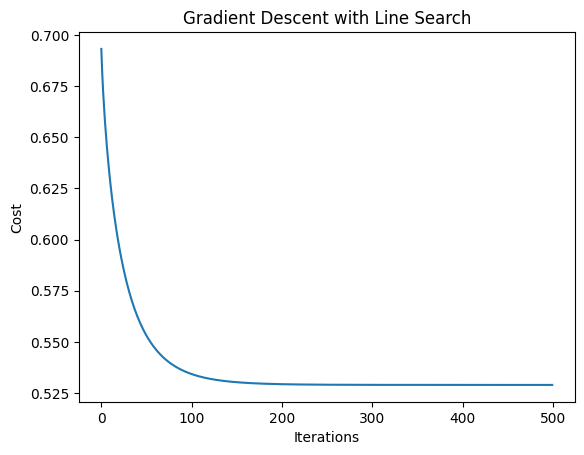

In [39]:
# Initialize parameters
initial_theta = np.zeros(X.shape[1])
lambda_ = 1

# Run gradient descent with line search
start_time = time.time()
optimal_theta, cost_history = gradient_descent_with_line_search(
    X, y, initial_theta, lambda_, max_iter=500, line_search="armijo", verbose=True, verbose_interval=50
)
end_time = time.time()
runtime = end_time - start_time

print(f"Runtime: {runtime:.4f} seconds")
print(f"Final cost: {cost_history[-1]}")
print(f"Optimal theta: {optimal_theta[:5]}")

# If degree = 6
# Cost at optimal theta: 0.5290027422869218 
# Optimal theta: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468]

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent with Line Search")
plt.show()


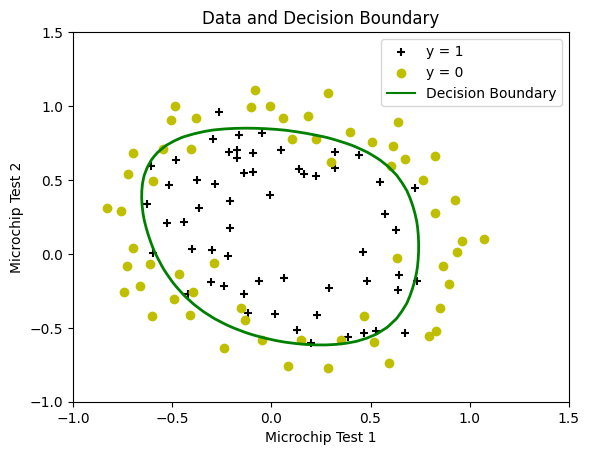

In [40]:
theta = optimal_theta

plot_decision_boundary(theta, X, y, degree)

In [ ]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Train Accuracy: {accuracy:.2f}%')